In [ ]:
!pap install pandas

/bin/bash: line 1: pap: command not found


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KaggleKaggelan/cleaned_merged_heart_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [ ]:
# Menampilkan data yang kosong (missing values) dalam DataFrame
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
jarak       0
dtype: int64


**KNN (K Nearest Neighbours)**

KNN adalah model mechine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tentangga terdekat.

KNN lebih akurat menggunakan data dengan 3 tetangga terdekat.

Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [ ]:
df['sex'] = df['sex'].replace({1: 'female', 0: 'male'})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,female,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,female,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,male,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,female,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,male,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,female,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,female,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,female,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,female,1,154,232,0,0,164,0,0.0,2,1,2,0


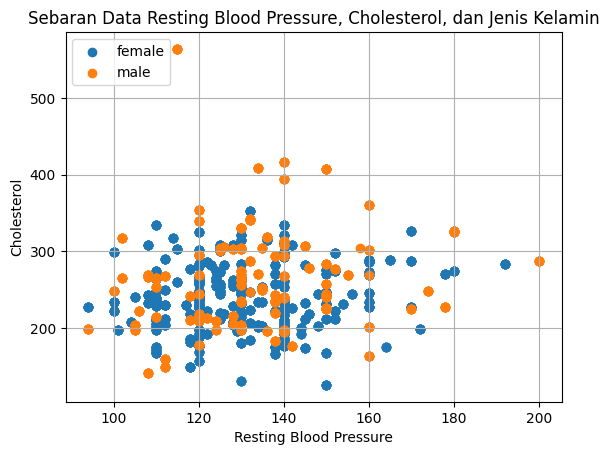

In [ ]:
# Menampilkan grafik dari female dan male (jenis kelamin) dengan titik dari data Resting Blood Presure dan Cholesterol
# X = trestbps , Y = chol, label = sex

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for sex, d in df.groupby('sex'):
  ax.scatter(d['trestbps'], d['chol'], label=sex)

plt.legend(loc='upper left')
plt.title('Sebaran Data Resting Blood Pressure, Cholesterol, dan Jenis Kelamin')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

# Ketika di-run maka terlihat bahwa warna biru yaitu female dan warna oranye adalah male
# Setelah itu, terlihat bahwa X label adalah trestbps dan Y label chol
# TItik terlihat berantakan karena berapa banyak data yang

**Classification dengan KNN**

In [ ]:
# Membantuk np array dary kolom trestbps dan chol, lalu yang sex
# np array pertama masuk ke x train, yang kedua masuk ke y train

import numpy as np

x_train = np.array(df[['trestbps', 'chol']])
y_train = np.array(df['sex'])

print(f'x_train:\n{x_train}\n')
print(f'y_train:\n{y_train}\n')

# Pada nilai target merupakan tipe data string,
# Untuk memudahkan evaluasi model maka harus diubah menjadi numerik

x_train:
[[145 233]
 [130 250]
 [130 204]
 ...
 [134 204]
 [154 232]
 [110 335]]

y_train:
['female' 'female' 'male' ... 'female' 'female' 'female']



In [ ]:
# Mengubah y train yaitu sex menjadi numerik untuk memudahkan evaluasi
# 0 = pria, 1 wanita

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}\n')

y_train:
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]



In [ ]:
# Mengubah array menjadi 1 dimensi

y_train = y_train.ravel()
print(f'y_train:\n{y_train}\n')

y_train:
[0 0 1 ... 0 0 0]



**Training KNN CLassification Model**

In [ ]:
# Memasukkan model untuk KNN, K sebagai 3 untuk menenentukan tetangga terdekat

from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Menentukan gender berdasarkan trestbps dan chol, misal saja mereka 119 dan 125
# Karena hanya terdapat 1 database, maka harus diubah menjadi 2 dimensi yaitu dengan 1, -1
# Dimensi yang mengatur baris = jumlah data
# Dimensi yang mengatur kolom = jumlah features

trestbps = 119
chol = 125
x_new = np.array([[trestbps, chol]]).reshape(1, -1)
x_new

array([[119, 125]])

In [ ]:
y_new = model.predict(x_new)
y_new

# Maka hasil yaitu dengan trestbps = 199 dan chol 125 menandakan bahwa
# Prediksi memiliki jenis kelamin female = 0

array([0])

In [ ]:
# Bila lupa array 0 itu jenis kelamin apa, bisa run code dibawah

lb.inverse_transform(y_new)

array(['female'], dtype='<U6')

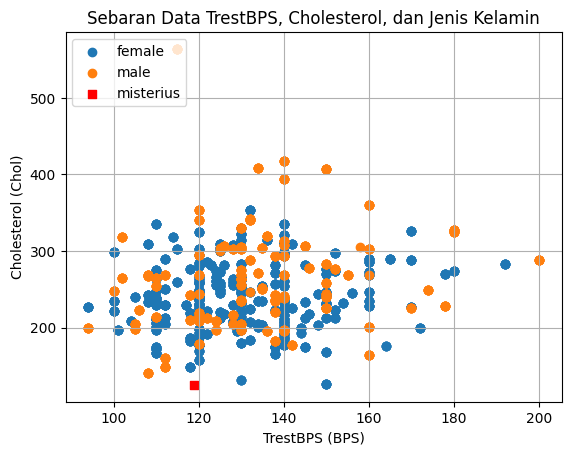

In [ ]:
# Visualisasikan posisi data baru terhadap sekumpulan data trestbps dan chol

fig, ax = plt.subplots()
for sex, d in df.groupby('sex'):
    ax.scatter(d['trestbps'], d['chol'], label=sex)

# Marker baru untuk memanggil untuk misterius
# Marker = S , square. Warna merah dan bernama misterius
plt.scatter(trestbps,
            chol,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data TrestBPS, Cholesterol, dan Jenis Kelamin')
plt.xlabel('TrestBPS (BPS)')
plt.ylabel('Cholesterol (Chol)')
plt.grid(True)
plt.show()

**Kalkulasi Distance (Euclidean Distance)**

Bagaimana KNN mengukur jarak atau kedekatan antara data baru yang diprediksi pada sekumpulan data lain pada dataset training.

Euclidean Distance = Satu datapoint dengan data point lainnya.

In [ ]:
# Mengubah misterius menjadi np array

misterius = np.array([trestbps, chol])
misterius

array([119, 125])

In [ ]:
x_train

array([[145, 233],
       [130, 250],
       [130, 204],
       ...,
       [134, 204],
       [154, 232],
       [110, 335]])

In [ ]:
# Menghitung jarak antara euclidean distance antara datapoint misterius,
# Dengan setiap datapoint lagi pada x train

from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in x_train]
data_jarak

[111.08555261599052,
 125.4830665866913,
 79.76214641043707,
 111.00450441310929,
 229.00218339570478,
 70.21395872616783,
 170.29973576021777,
 138.00362314084367,
 91.02197536858887,
 53.009433122794285,
 115.91807451816995,
 150.4027925272666,
 141.42842712835352,
 86.46964785403026,
 161.01242188104618,
 94.00531899844816,
 215.00232556881798,
 105.65036677645753,
 125.87692401707312,
 115.91807451816995,
 110.16805344563369,
 108.55873986004075,
 103.16006979447037,
 122.00409829181969,
 76.92203845452875,
 181.6865432551349,
 92.35799911215054,
 50.80354318352215,
 292.7541630788536,
 72.83543093852057,
 74.33034373659252,
 52.009614495783374,
 94.64142856064674,
 148.12157169028418,
 88.20430828479978,
 56.859475903318,
 179.71366113904642,
 111.40017953306898,
 148.43180252223578,
 238.549785160247,
 184.20097719610501,
 120.50311199301038,
 84.34453153583817,
 139.43457247038842,
 197.12178976460214,
 200.0024999843752,
 111.9866063420086,
 133.3604139165742,
 91.4439719172346

In [ ]:
# Mempermudah proses pengamatan, maka akan membuat kolom baru
# Mengaturnya dengan data ascending, yaitu dari kecil ke besar

df['jarak'] = data_jarak
df.sort_values(['jarak'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target,jarak
301,57,female,0,130,131,0,1,115,1,1.2,1,1,3,0,12.529964
1185,57,female,0,130,131,0,1,115,1,1.2,1,1,3,0,12.529964
335,57,female,0,130,131,0,1,115,1,1.2,1,1,3,0,12.529964
1228,57,female,0,130,131,0,1,115,1,1.2,1,1,3,0,12.529964
1036,44,male,2,108,141,0,1,175,0,0.6,1,0,2,1,19.416488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,67,male,2,115,564,0,0,160,0,1.6,1,0,3,1,439.018223
85,67,male,2,115,564,0,0,160,0,1.6,1,0,3,1,439.018223
1330,67,male,3,115,564,0,2,160,0,1.6,2,0,7,0,439.018223
767,67,male,2,115,564,0,0,160,0,1.6,1,0,3,1,439.018223


In [ ]:
# TESTING SET

x_train = np.array(df[['trestbps', 'chol']])
y_train = lb.transform(np.array(df['sex'])).flatten()

print(f'x_train:\n{x_train}\n')
print(f'y_train:\n{y_train}')

x_train:
[[145 233]
 [130 250]
 [130 204]
 ...
 [134 204]
 [154 232]
 [110 335]]

y_train:
[0 0 1 ... 0 0 0]


In [ ]:
# PREDIKSI TERHADAP TESTING SET

y_pred = model.predict(x_train)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

**Accuracy**

Akurasi adalah proporsi dati instances pada train test yang diklasifikasikan dengan benar atau tepat.

In [ ]:
# Melihat berapa besar akurasi dari data yang sudah ada
# Nilai data akurasi adalah 97%

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_train, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.9703389830508474


**Precission**

Merupakan proporsi dari testing set yang diprediksi sebagai positif oleh model yang memang benar positif.

In [ ]:
from sklearn.metrics import precision_score

prec = precision_score(y_train, y_pred)
print(f'Precision: {prec}')

Precision: 0.9618055555555556


**Recall**

Proposi dari data pada testing yang memang benar positif pada data yang diprediksi sebaagai positif.

In [ ]:
from sklearn.metrics import recall_score

rec = recall_score(y_train, y_pred)
print(f'Recall: {rec}')

Recall: 0.9421768707482994


**F1 Score**

Nilai rata-rata harmonic dari precision dan recall.

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.9518900343642611


In [ ]:
# CLASSIFICATION REPORT

from sklearn.metrics import classification_report

cls_report = classification_report(y_train, y_pred)
print(f'Classification Report:\n{cls_report}')

# Bisa terlihat nilai dari precision, recall, dan fit-score
# Nilai precision untuk kelas target 0 dan kelas target 1
# Berapa banyakpun target nilai maka akan diasumsikan menjadi nilai positif atau negatif,
# 1 = positif , 0 = negatif

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1300
           1       0.96      0.94      0.95       588

    accuracy                           0.97      1888
   macro avg       0.97      0.96      0.97      1888
weighted avg       0.97      0.97      0.97      1888



**Matthews Correlation Coefficient (MCC)**

- MCC merupakan alternatif untuk F1 Score untuk pengumpulan performa
- NIlai tertinggi adalah 1
- Kalau prediksi secara acak, maka nilai score adalah 0
- Model tidak benar, adalah -1

In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_train, y_pred)
print(f'MCC: {mcc}')

MCC: 0.9305571587175386
